In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Logistic/

/content/drive/MyDrive/Logistic


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data

- Product info

In [ ]:
tmp = pd.read_excel('data/THESIS-Sales-and-Master-data.xlsx', 'Master Data', header=None).T
name_map = {k:v for k,v in zip(tmp.columns, tmp.iloc[0])}
tmp.rename(columns=name_map, inplace=True)
product_info = tmp.drop(0)

print(product_info.shape)
product_info.head()

(23, 9)


,Description,Product Group,Brand,Product ID,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase (VND),COGSPerCase
1,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,12385000,270,0.99,730,157000,47100
2,MILO Magma Stick 36x55g TH,STICK,MILO,12383255,270,1.98,730,262000,86460
3,Extreme NAMA Salted Caramel stick 24x65g TH,STICK,NAMA,12397405,270,1.56,730,314000,103620
4,OREO Stick 18x60 g. TH,STICK,OREO,12383253,270,1.08,730,270000,89100
5,Extreme Nama DarkChocBrowniesStk24x65gTH,STICK,NAMA,12435405,220,1.56,730,360000,118800


In [ ]:
# to int
cols = ['CasePerPallet', 'ShelfLifeInDays', 'NetSalesValuePerCase (VND)', 'COGSPerCase']
product_info[cols] = product_info[cols].astype(int)

# to float
product_info['KgPerCase'] = product_info['KgPerCase'].astype(float)

product_info.dtypes

Description                    object
Product Group                  object
Brand                          object
Product ID                     object
CasePerPallet                   int64
KgPerCase                     float64
ShelfLifeInDays                 int64
NetSalesValuePerCase (VND)      int64
COGSPerCase                     int64
dtype: object

In [ ]:
# preprocess: make sure cate cols are space-stripped
cate_cols = product_info.select_dtypes('object').columns

for col in cate_cols:
    product_info[col] = product_info[col].astype(str).str.strip()

- Product monthly demand

In [ ]:
tmp = pd.read_excel('data/THESIS-Sales-and-Master-data.xlsx', 'Sales data')
tmp = tmp.drop(['Unnamed: 0'], axis=1)
data = {'product id': [], 'date': [], 'demand': []} # PK: {id, date}
product_ids = [str(id) for id in tmp.columns[1:]]

for i in range(tmp.shape[0]):
    for j in range(len(product_ids)):
        data['date'].append(tmp.iloc[i,0])
        data['product id'].append(product_ids[j])
        data['demand'].append(int(tmp.iloc[i,j+1]))

product_demand = pd.DataFrame(data, columns=data.keys())
product_demand

,product id,date,demand
0,12385000,2019-03-01,3780
1,12383255,2019-03-01,3240
2,12397405,2019-03-01,1890
3,12383253,2019-03-01,4320
4,12435405,2019-03-01,1100
...,...,...,...
846,12271540,2022-03-01,1644
847,12426559,2022-03-01,1096
848,12477101,2022-03-01,1586
849,12300362,2022-03-01,63


In [ ]:
product_demand.dtypes

product id            object
date          datetime64[ns]
demand                 int64
dtype: object

- Merge data

In [ ]:
merged_data = product_info.merge(product_demand, left_on='Product ID', right_on='product id')
merged_data.drop(columns=['product id'], inplace=True)

# rename
merged_data.rename(columns={
    'Product Group': 'Group',
    'Product ID': 'ID', 
    'NetSalesValuePerCase (VND)': 'NetSalesValuePerCase',
    'date': 'Date'
}, inplace=True)
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%m-%d-%Y')

print(merged_data.shape) # 11 cols
merged_data

(851, 11)


,Description,Group,Brand,ID,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,Date,demand
0,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,12385000,270,0.99,730,157000,47100,2019-03-01,3780
1,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,12385000,270,0.99,730,157000,47100,2019-04-01,3780
2,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,12385000,270,0.99,730,157000,47100,2019-05-01,6480
3,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,12385000,270,0.99,730,157000,47100,2019-06-01,3780
4,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,12385000,270,0.99,730,157000,47100,2019-07-01,5397
...,...,...,...,...,...,...,...,...,...,...,...
846,NESTLE OREO Cone 12(4x110ml) XO,MULTIPACK,OREO,12400821,84,3.43,730,807000,225960,2021-11-01,138
847,NESTLE OREO Cone 12(4x110ml) XO,MULTIPACK,OREO,12400821,84,3.43,730,807000,225960,2021-12-01,147
848,NESTLE OREO Cone 12(4x110ml) XO,MULTIPACK,OREO,12400821,84,3.43,730,807000,225960,2022-01-01,94
849,NESTLE OREO Cone 12(4x110ml) XO,MULTIPACK,OREO,12400821,84,3.43,730,807000,225960,2022-02-01,94


# Explore

In [ ]:
merged_data.columns

Index(['Description', 'Group', 'Brand', 'ID', 'CasePerPallet', 'KgPerCase',
       'ShelfLifeInDays', 'NetSalesValuePerCase', 'COGSPerCase', 'Date',
       'demand'],
      dtype='object')

In [ ]:
merged_data.dtypes

Description                     object
Group                           object
Brand                           object
ID                              object
CasePerPallet                    int64
KgPerCase                      float64
ShelfLifeInDays                  int64
NetSalesValuePerCase             int64
COGSPerCase                      int64
Date                    datetime64[ns]
demand                           int64
dtype: object

- Check nume cols

In [ ]:
nume_cols = merged_data.select_dtypes([np.int64, np.float64, np.datetime64]).columns 
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)

merged_data[nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])

,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,Date,demand
missing_ratio,0.0,0.00,0.0,0.0,0.0,0.0,0.0
min,84.0,0.99,180.0,157000.0,47100.0,2019-03-01 00:00:00,56.0
max,270.0,3.89,730.0,807000.0,248150.0,2022-03-01 00:00:00,7020.0
nunique,9.0,15.00,3.0,21.0,22.0,37,468.0


$\to$ `ShelfLifeInDays` là categorical var

- Check cate cols

In [ ]:
cat_cols = merged_data.select_dtypes(include=["object"])
cat_cols.apply([missing_ratio, pd.Series.nunique])

,Description,Group,Brand,ID
missing_ratio,0.0,0.0,0.0,0.0
nunique,23.0,7.0,8.0,23.0


# Fake daily data

In [ ]:
# util
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

print('Start Date:', merged_data['Date'].min())
print('End Date:', merged_data['Date'].max())
print('Days gap:', merged_data['Date'].max() - merged_data['Date'].min())
print('Month gap:', diff_month(merged_data['Date'].max(), merged_data['Date'].min()))

Start Date: 2019-03-01 00:00:00
End Date: 2022-03-01 00:00:00
Days gap: 1096 days 00:00:00
Month gap: 36


$\to$ Note: Demand của mỗi tháng dc ghi lại vào đầu tháng đó, tức demand của `2019-03-01` là demand của cả tháng 3

- Tạo hàm `fake_data` nhận vào demand 1 tháng và trả ra demand từ ngày `Start Date` tới ngày `End Date` ở trên dựa vào phân phối Dirichlet. Số hàng thể hiện số tháng, số cột thể hiện số ngày tháng đó, thiết lập cứng là 31 cột (với gtrị 0 để bù vào những tháng ko có đủ 31 ngày) 
- Ngày lễ, Sat, Sun có proportion là 7%. Các ngày thường 5%

In [ ]:
holiday_df = pd.read_csv('data/holidays.csv')
holiday_df['month'] = holiday_df['date'].str[-1].astype(int)
holiday_df['day'] = holiday_df['date'].apply(lambda x: x.split('/')[0]).astype(int)
holiday_df.dtypes

date          object
workingday     int64
month          int64
day            int64
dtype: object

In [ ]:
holiday_df.head()

,date,workingday,month,day
0,1/1,0,1,1
1,2/1,0,1,2
2,3/1,0,1,3
3,4/1,0,1,4
4,9/1,1,1,9


In [ ]:
# Read holidays
import datetime

def is_holiday(date, holidays=holiday_df):
    for d, m in zip(holiday_df['day'], holiday_df['month']):
        if date.month == m and date.day == d:
            return True
    return False 

# TEST
print(is_holiday(datetime.datetime(2022, 1, 4))) # True
is_holiday(datetime.datetime(2022, 1, 5)) # False

True


False

In [ ]:
def spec_norm_dates(month, year):
    _, num_days = calendar.monthrange(year, month)
    special_dates = []
    normal_dates = []

    for day in range(1, num_days+1):
        cur_date = datetime.date(year, month, day)
            
        if cur_date.weekday() in [5,6] or is_holiday(cur_date):
            special_dates.append(cur_date)
        else: # nếu là ngày lễ
            normal_dates.append(cur_date)
    return special_dates, normal_dates

# TEST
specs, norms = spec_norm_dates(3, 2019)
len(specs) + len(norms)

31

In [ ]:
import calendar
import datetime

def fake_data(month_demand):
    global merged_data
    daily_prop = np.empty((0,31))
    for year in  [2019, 2020, 2021, 2022]:
        for month in range(1,13):
            _, num_days = calendar.monthrange(year, month)
            special_dates, normal_dates = spec_norm_dates(month, year)
            prop_spec = 4.5
            prop_norm = (100 - prop_spec * len(special_dates)) / len(normal_dates)
            tmp = []
            for day in range(1, num_days+1):
                # ngày thường: x%, weekend+holidays: 4.5%
                cur_date = datetime.date(year, month, day)
                tmp.append(prop_spec if cur_date in special_dates else prop_norm)
            daily_month_prop = np.random.dirichlet(tmp, 1) # dirichlet to fake data for each month
            if daily_month_prop.shape[1] < 31:
                daily_month_prop = np.append(daily_month_prop, [[0] * (31 - daily_month_prop.shape[1])], axis=1)
            daily_prop = np.append(daily_prop, daily_month_prop, axis=0)
    
    # Bắt đầu từ 02/2019 tới 02/2022 nên thu hẹp khoảng shape trên
    daily_prop = daily_prop[2:-9,:]
    assert daily_prop.shape[0] == diff_month(merged_data['Date'].max(), merged_data['Date'].min()) + 1
    assert daily_prop[1, -1] == 0 # ràng buộc đầu: tháng 4/2019 có 30 ngày
    return np.ceil(daily_prop * month_demand)

# TEST
fake_data(1000)

array([[ 7., 31., 92., ..., 29., 22., 23.],
       [30., 16., 24., ..., 20., 17.,  0.],
       [60., 21., 28., ..., 25., 25., 16.],
       ...,
       [95., 75., 20., ..., 58., 59., 28.],
       [28., 52., 19., ...,  0.,  0.,  0.],
       [31., 24., 19., ..., 32., 26., 26.]])

- Tạo hàm `fake_data_prod` nhận product_id và trả về demand theo ngày cho product đó

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def fake_data_prod(prod_id: str):
    global merged_data
    prod_df = merged_data.loc[merged_data['ID'] == prod_id, ['demand', 'Date']]
    new_data = pd.DataFrame(columns=['product_id', 'date', 'demand'])

    for imonth, (demand, date) in enumerate(zip(prod_df['demand'], prod_df['Date'])):
        month_data = fake_data(demand)
        start_date = datetime.date(date.year, date.month, date.day)
        _, num_days = calendar.monthrange(start_date.year, start_date.month)
        
        for day_pass in range(0, num_days):
            current_date = start_date + datetime.timedelta(days=day_pass)
            new_data = new_data.append({
                'product_id': prod_id,
                'demand': month_data[imonth, day_pass],
                'date': current_date
            }, ignore_index=True)
    
    assert new_data.shape[0] - 31 == 1096
    return new_data

# TEST
prod_demand = fake_data_prod('12385000')
prod_demand.head()

,product_id,date,demand
0,12385000,2019-03-01,72.0
1,12385000,2019-03-02,124.0
2,12385000,2019-03-03,155.0
3,12385000,2019-03-04,49.0
4,12385000,2019-03-05,134.0


- Tổng quát cho demand theo ngày của tất cả product có trong data gốc và lưu data mới này vào biến `daily_demand`

In [ ]:
daily_demand = pd.DataFrame()
for id in merged_data['ID'].unique():
    prod_demand = fake_data_prod(id)
    daily_demand = daily_demand.append(prod_demand, ignore_index=True)

print(daily_demand.shape)
daily_demand.sample(5, random_state=0)

(25921, 3)


,product_id,date,demand
13139,12383250,2021-03-12,8.0
25127,12400821,2020-01-28,1.0
23408,12477101,2021-07-16,36.0
6674,12291880,2022-01-03,54.0
13112,12383250,2021-02-13,7.0


In [ ]:
assert daily_demand[daily_demand['demand'] == 0].shape[0] == 0 # nếu raise lỗi fải xử lý cho daily_demand=0

In [ ]:
# Preprocess data type
daily_demand = daily_demand.sort_values('date', ignore_index=True)
daily_demand['date'] = pd.to_datetime(daily_demand['date'])
daily_demand['demand'] = daily_demand['demand'].astype(int)
daily_demand.dtypes

product_id            object
date          datetime64[ns]
demand                 int64
dtype: object

In [ ]:
# Preprocess column names
daily_demand = daily_demand.merge(product_info, left_on='product_id', right_on='Product ID').drop(columns=['Product ID'])
daily_demand.rename(columns={
    'Product Group': 'Group',
    'NetSalesValuePerCase (VND)': 'NetSalesValuePerCase'
}, inplace=True)

daily_demand.head()

,product_id,date,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase
0,12385000,2019-03-01,87,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100
1,12385000,2019-03-02,321,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100
2,12385000,2019-03-03,111,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100
3,12385000,2019-03-04,102,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100
4,12385000,2019-03-05,113,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100


# Feature engineering
Bước này tạo thêm cột mới

In [ ]:
daily_demand['ProfitPerCase'] = daily_demand['NetSalesValuePerCase'] - daily_demand['COGSPerCase']
daily_demand['DailyProfit'] = daily_demand['ProfitPerCase'] * daily_demand['demand']

- `ShelfLifeLabel`

In [ ]:
# shelf-life label (redefine)
def shelf_life_label(days):
    if days <= 180:
        return 'Short'
    elif 181 <= days <= 370:
        return 'Medium'
    elif 400 <= days <= 750:
        return 'Long'

daily_demand['ShelfLifeLabel'] = daily_demand['ShelfLifeInDays'].apply(lambda x: shelf_life_label(x))
daily_demand['ShelfLifeLabel'].unique()        

array(['Long', 'Medium', 'Short'], dtype=object)

- `StockMovement`

In [ ]:
daily_sales = daily_demand['demand'].sort_values(ascending=False)
n = len(daily_sales)
lst = []
start = 0; end = 0

for pct in [0.7, 0.2, 0.1]:
    end += int(np.round(pct*n))
    lst.append(daily_sales.iloc[start:end+1])
    start = end+1
    n -= (end-start+1)

daily_demand['StockMovement'] = np.nan
daily_demand['Profitability'] = np.nan

daily_demand.iloc[lst[0].index, -2] = 'Fast'
daily_demand.iloc[lst[0].index, -1] = 'A'

daily_demand.iloc[lst[1].index, -2] = 'Normal'
daily_demand.iloc[lst[1].index, -1] = 'B'

daily_demand.iloc[lst[2].index, -2] = 'Slow'
daily_demand.iloc[lst[2].index, -1] = 'C'

print(daily_demand['StockMovement'].unique())
daily_demand['Profitability'].unique()

['Fast' 'Normal' 'Slow']


array(['A', 'B', 'C'], dtype=object)

- `Perish`

In [ ]:
conditions = [
    (daily_demand['ShelfLifeLabel'] == 'Long') & (daily_demand['StockMovement'] == 'Slow'),
    (daily_demand['ShelfLifeLabel'] == 'Long') & (daily_demand['StockMovement'] == 'Normal'),
    (daily_demand['ShelfLifeLabel'] == 'Long') & (daily_demand['StockMovement'] == 'Fast'),
    (daily_demand['ShelfLifeLabel'] == 'Medium') & (daily_demand['StockMovement'] == 'Slow'),
    (daily_demand['ShelfLifeLabel'] == 'Medium') & (daily_demand['StockMovement'] == 'Normal'),
    (daily_demand['ShelfLifeLabel'] == 'Medium') & (daily_demand['StockMovement'] == 'Fast'),
    (daily_demand['ShelfLifeLabel'] == 'Short') & (daily_demand['StockMovement'] == 'Slow'),
    (daily_demand['ShelfLifeLabel'] == 'Short') & (daily_demand['StockMovement'] == 'Normal'),
    (daily_demand['ShelfLifeLabel'] == 'Short') & (daily_demand['StockMovement'] == 'Fast')
]

values = ['C1', 'C2', 'C3', 'B1','B2','B3','A1','A2','A3']

daily_demand['Perish'] = np.select(conditions, values)
daily_demand['Perish'].unique()

array(['C3', 'C2', 'C1', 'B3', 'B2', 'B1', 'A3', 'A2', 'A1'], dtype=object)

In [ ]:
daily_demand # final version

,product_id,date,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish
0,12385000,2019-03-01,87,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,9561300,Long,Fast,A,C3
1,12385000,2019-03-02,321,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,35277900,Long,Fast,A,C3
2,12385000,2019-03-03,111,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,12198900,Long,Fast,A,C3
3,12385000,2019-03-04,102,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,11209800,Long,Fast,A,C3
4,12385000,2019-03-05,113,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,12418700,Long,Fast,A,C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25916,12435418,2022-03-27,73,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,13058970,Long,Fast,A,C3
25917,12435418,2022-03-28,40,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,7155600,Long,Fast,A,C3
25918,12435418,2022-03-29,46,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,8228940,Long,Fast,A,C3
25919,12435418,2022-03-30,82,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,14668980,Long,Fast,A,C3


In [ ]:
# save to .csv
daily_demand.to_csv('data/daily_demand.csv', index=False)

# Post-process

In [ ]:
daily_demand = pd.read_csv('data/daily_demand.csv')

In [ ]:
# TODO: check dtypes & preprocess 
daily_demand['date'] = pd.to_datetime(daily_demand['date'])
daily_demand['product_id'] = daily_demand['product_id'].astype(str)
daily_demand.dtypes

product_id                      object
date                    datetime64[ns]
demand                           int64
Description                     object
Group                           object
Brand                           object
CasePerPallet                    int64
KgPerCase                      float64
ShelfLifeInDays                  int64
NetSalesValuePerCase             int64
COGSPerCase                      int64
ProfitPerCase                    int64
DailyProfit                      int64
ShelfLifeLabel                  object
StockMovement                   object
Profitability                   object
Perish                          object
dtype: object

In [ ]:
# add monthly demand
tmp = pd.read_excel('data/THESIS-Sales-and-Master-data.xlsx', 'Sales data')
tmp = tmp.drop(['Unnamed: 0'], axis=1)
data = {'product_id': [], 'date': [], 'monthly_demand': []} # PK: {id, date}
product_ids = [str(id) for id in tmp.columns[1:]]

for i in range(tmp.shape[0]):
    for j in range(len(product_ids)):
        data['date'].append(tmp.iloc[i,0])
        data['product_id'].append(product_ids[j])
        data['monthly_demand'].append(int(tmp.iloc[i,j+1]))

product_demand = pd.DataFrame(data, columns=data.keys())
product_demand['date'] = pd.to_datetime(product_demand['date'])

daily_demand = daily_demand.merge(product_demand, left_on=['product_id', 'date'], 
                         right_on=['product_id', 'date'], how='outer')
daily_demand.monthly_demand = daily_demand.monthly_demand.fillna(method="ffill")

daily_demand['demand'] = daily_demand['demand'].astype(int)
daily_demand['monthly_demand'] = daily_demand['monthly_demand'].astype(int)
daily_demand

,product_id,date,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,monthly_demand
0,12385000,2019-03-01,87,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,9561300,Long,Fast,A,C3,3780
1,12385000,2019-03-02,321,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,35277900,Long,Fast,A,C3,3780
2,12385000,2019-03-03,111,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,12198900,Long,Fast,A,C3,3780
3,12385000,2019-03-04,102,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,11209800,Long,Fast,A,C3,3780
4,12385000,2019-03-05,113,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,109900,12418700,Long,Fast,A,C3,3780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25916,12435418,2022-03-27,73,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,13058970,Long,Fast,A,C3,2140
25917,12435418,2022-03-28,40,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,7155600,Long,Fast,A,C3,2140
25918,12435418,2022-03-29,46,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,8228940,Long,Fast,A,C3,2140
25919,12435418,2022-03-30,82,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,88110,178890,14668980,Long,Fast,A,C3,2140


In [ ]:
daily_demand = daily_demand.set_index('date')

In [ ]:
# visualize 'daily_demand' & 'monthly_demand'
import os
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

save = './data_analysis'

for prod_id in daily_demand['product_id'].unique():
    fig, ax = plt.subplots(figsize=(12, 22), nrows=4, ncols=1, facecolor='white')

    prod_df = daily_demand.loc[daily_demand['product_id'] == prod_id, ['Description', 'demand']]
    prod_name = prod_df['Description'].iloc[0]

    # daily demand 
    prod_df['demand'].plot(label='daily demand', ax=ax[0], xlabel='', ylabel='demand (unit: Case)')
    ax[0].set_title('Daily demand')

    # monthly demand
    product_demand.loc[product_demand['product_id'] == prod_id, 'monthly_demand'].plot(label='monthly demand', 
                                                                                       marker='.', ax=ax[1],
                                                                                       xlabel='', ylabel='demand (unit: Case)')
    ax[1].set_title('Monthly demand')

    # autocorr plot
    _ = plot_acf(prod_df['demand'], lags=30, ax=ax[2])
    ax[2].set_ylabel('correlation')
    ax[2].set_xlabel('lags')

    # seasonality
    prod_df = prod_df[prod_df.index < '2020-03-01'] # chỉ xem từ 03/2019 - 02/2020
    prod_df['month'] = prod_df.index.month
    prod_df.boxplot(column='demand', by='month', ax=ax[3],)
    prod_df.groupby('month')['demand'].median().plot(style='o-', color='orange', linewidth=0.8, ax=ax[3])
    ax[3].set_ylabel('demand (unit: Case)')
    ax[3].set_title('Demand distribution by month')

    fig.suptitle(f'{prod_name} (ID: {prod_id})', fontsize=15, y=0.94)
    
    if not os.path.exists(save):
        os.makedirs(save)
    plt.savefig(os.path.join(save, f'{prod_id}.png'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
prod_df[prod_df.index < '2020-03-01']

,Description,demand,month
date,,,
2019-03-01,MILO Chocolate Malt Cup 18x55g TH,87,3
2019-03-02,MILO Chocolate Malt Cup 18x55g TH,321,3
2019-03-03,MILO Chocolate Malt Cup 18x55g TH,111,3
2019-03-04,MILO Chocolate Malt Cup 18x55g TH,102,3
2019-03-05,MILO Chocolate Malt Cup 18x55g TH,113,3
...,...,...,...
2020-02-25,MILO Chocolate Malt Cup 18x55g TH,51,2
2020-02-26,MILO Chocolate Malt Cup 18x55g TH,54,2
2020-02-27,MILO Chocolate Malt Cup 18x55g TH,77,2


In [ ]:
from scipy.stats import zscore

prod_df = daily_demand.loc[daily_demand['product_id'] == '12271016', ['demand']]
z_scores = prod_df.apply(zscore)
threshold = 3

outliers = prod_df[(z_scores.abs() > threshold).any(axis=1)]
outliers

,demand
date,
2019-03-26,96
2019-04-15,105
2019-04-30,124
2019-06-15,132
2019-06-26,96
2019-06-28,96
2019-07-04,111
2019-07-06,106
2019-07-07,171


In [ ]:
z_scores

,demand
date,
2019-03-01,-0.765922
2019-03-02,1.054658
2019-03-03,1.246298
2019-03-04,-0.670102
2019-03-05,-1.197112
...,...
2022-03-27,2.923148
2022-03-28,-0.430552
2022-03-29,1.342118


# Draft

## Multi-variate XGBoosting (Framework: ForecasterAutoreg)
1 model cho mỗi product 

### Train/test/split

In [ ]:
pd.set_option('display.max_columns', None)
daily_demand = daily_demand.set_index('date')
daily_demand.agg([pd.Series.nunique])

,product_id,demand,Description,Group,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,weekday,month,week_of_month,year,workingday,monthly_demand
nunique,23,413,23,7,9,15,3,21,22,22,2957,3,3,3,9,7,12,6,4,2,482


Vì có 1 vài cột là tĩnh xuyên suốt dòng thời gian của mỗi product, nên nó sẽ ko đóng góp gì cho model. Ta loại nó đi

In [ ]:
cols_drop = ['Description', 'Group', 'CasePerPallet', 'KgPerCase', 'ShelfLifeInDays', 'COGSPerCase', 
             'NetSalesValuePerCase', 'ProfitPerCase', 'ShelfLifeLabel']
daily_demand.drop(columns=cols_drop, inplace=True)
daily_demand.agg([pd.Series.nunique])

,product_id,demand,DailyProfit,StockMovement,Profitability,Perish,weekday,month,week_of_month,year,workingday,monthly_demand
nunique,23,413,2957,3,3,9,7,12,6,4,2,482


- One-hot encoding categorical cols (except bool cols)

In [ ]:
cols_to_encode = ['StockMovement', 'Profitability', 'Perish', 'weekday', 'month', 'week_of_month', 'year']
daily_demand = pd.get_dummies(daily_demand, columns=cols_to_encode)
daily_demand.head(3)

,product_id,demand,DailyProfit,workingday,monthly_demand,StockMovement_Fast,StockMovement_Normal,StockMovement_Slow,Profitability_A,Profitability_B,Profitability_C,Perish_A1,Perish_A2,Perish_A3,Perish_B1,Perish_B2,Perish_B3,Perish_C1,Perish_C2,Perish_C3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,week_of_month_6,year_2019,year_2020,year_2021,year_2022
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-01,12385000,156,17144400.0,1,3780,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-03-02,12385000,128,14067200.0,0,3780,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-03-03,12385000,92,10110800.0,0,3780,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
exog_variables = [column for column in daily_demand.columns
                      if column.startswith(tuple(cols_to_encode))]
exog_variables.remove('monthly_demand')
exog_variables

['StockMovement_Fast',
 'StockMovement_Normal',
 'StockMovement_Slow',
 'Profitability_A',
 'Profitability_B',
 'Profitability_C',
 'Perish_A1',
 'Perish_A2',
 'Perish_A3',
 'Perish_B1',
 'Perish_B2',
 'Perish_B3',
 'Perish_C1',
 'Perish_C2',
 'Perish_C3',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'week_of_month_1',
 'week_of_month_2',
 'week_of_month_3',
 'week_of_month_4',
 'week_of_month_5',
 'week_of_month_6',
 'year_2019',
 'year_2020',
 'year_2021',
 'year_2022']

In [ ]:
import datetime

# util: chú ý .loc[] lấy luôn giá trị biên
def final_index(date: str):
    return (datetime.datetime.strptime(date, '%Y-%m-%d') - datetime.timedelta(days=1)).strftime('%Y-%m-%d')

end_train = '2020-12-01'
end_validation = '2021-06-01'

data_train = daily_demand.loc[:final_index(end_train), :]
data_val = daily_demand.loc[end_train:final_index(end_validation), :]
data_test = daily_demand.loc[end_validation:, :]

print(data_train.shape, data_val.shape, data_test.shape)
assert data_train.shape[0] + data_val.shape[0] + data_test.shape[0] == daily_demand.shape[0]

(14743, 49) (4186, 49) (6992, 49)


- Autocorr plot:

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

# _ = plot_acf(data_train['demand'], lags=25)

- Real data plot:

In [ ]:
# cols = ['demand', 'DailyProfit']
# axes = data_train[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)

### Model

- Định nghĩa mô hình forecaster cho pha training tiếp theo

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster

- Daily forecast

In [ ]:
def daily_predict(forecaster, prod_df, end_validation=end_validation):
    # dùng forecaster để predict demand tương lai, cứ predict xong <steps> ngày thì add <steps> ngày vào train_set
    metric, predictions = backtesting_forecaster(
        forecaster = forecaster,
        y          = prod_df['demand'],
        initial_train_size = len(prod_df.loc[:end_validation]), # train_set = initial_trains_set + val_set
        fixed_train_size   = False, # if False, allow train_ser to be updated
        steps      = 2, # predicts and stores the next <steps> days
        refit      = False, # if True, train_set increases to a length of initial_train_size + steps, and test_set becomes the following 10 steps.
        metric     = 'mean_absolute_percentage_error',
        verbose    = False # Change to True to see detailed information
    )

    predictions = predictions.reset_index(drop=True)
    
    test_set = prod_df.loc[end_validation:, :]
    predictions['gt'] = test_set['demand'].reset_index(drop=True)
    predictions['pred'] = np.ceil(predictions['pred'])

    return metric, predictions

- Monthly forecast

In [ ]:
import calendar
import datetime
from sklearn.metrics import mean_absolute_percentage_error

# read monthly gt 
tmp = pd.read_excel('data/Sales-and-Master-data.xlsx', 'Sales data')
tmp = tmp.drop(['Unnamed: 0'], axis=1)
data = {'product id': [], 'date': [], 'demand': []} # PK: {id, date}
product_ids = [str(id) for id in tmp.columns[1:]]

for i in range(tmp.shape[0]):
    for j in range(len(product_ids)):
        data['date'].append(tmp.iloc[i,0])
        data['product id'].append(product_ids[j])
        data['demand'].append(int(tmp.iloc[i,j+1]))

gt = pd.DataFrame(data, columns=data.keys())
gt['date'] = pd.to_datetime(gt['date'], '%Y-%m-%d')
gt = gt.set_index('date')

def monthly_predict(daily_predictions, data_test, monthly_gt=gt):
    # ------ADD MONTHLY PREDICTION COLUMN------
    test_time = data_test.index[data_test.index.day == 1]
    i = 0
    monthly_pred = {'date': [], 'pred': []}

    # 1/6/2021 - 31/3/2022: 302 days
    for time in test_time:
        _, num_days = calendar.monthrange(time.year, time.month)

        # gộp mỗi 30/31 ngày thành 1 tháng
        monthly_pred['date'].append(datetime.datetime(time.year, time.month, 1))
        monthly_pred['pred'].append(np.ceil(daily_predictions.iloc[i:i+num_days, :].sum()[0]))
        i += num_days

    # ------ADD MONTHLY GROUND-TRUTH COLUMN------
    gt_test = monthly_gt.loc[end_validation:]
    gt_prod = gt_test.loc[gt_test['product id'] == prod_id, 'demand']
    monthly_pred['gt'] = gt_prod.values

    # ------FINAL MONTHLY PRED DATAFRAME------
    monthly_demand = pd.DataFrame(monthly_pred)
    monthly_demand['pred'] = monthly_demand['pred'].astype(int)
    monthly_demand = monthly_demand.set_index('date')
    mape = mean_absolute_percentage_error(monthly_demand['pred'], monthly_demand['gt']) 

    return mape, monthly_demand

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error

mape_dict = {'prod_id': daily_demand['product_id'].unique(), 
             'daily_mape': [], 
             'monthly_mape': []}

for i, prod_id in enumerate(tqdm(mape_dict['prod_id'])):
    # -------Define forecaster-------
    forecaster = ForecasterAutoreg(
                     regressor     = XGBRegressor(random_state=123),
                     lags          = 1, # for each prediction, the demand values of the previous <lags> days are used as predictors (will be replaced if you use grid_search)
                     transformer_y = StandardScaler()
                 )
    
    # -------filter data of product_id-------
    prod_df = daily_demand[daily_demand['product_id'] == prod_id]
    prod_df.drop(columns=['product_id'], inplace=True)
    
    train_set = prod_df.loc[:final_index(end_train), :]
    val_set = prod_df.loc[end_train:final_index(end_validation), :]
    test_set = prod_df.loc[end_validation:, :]

    # -------Find best model for each prod-------
    param_grid = {
        'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
        'max_depth': np.arange(1, 12, 2), # Maximum tree depth for base learners.
        'learning_rate': [0.01, 0.05, 0.1],
        'max_leaves': np.arange(1,12,2)
        }

    # lags added to the train_set 
    lags_grid = [7, 15, 30, 182, [7, 15, 30, 120, 182, 365]] # week, half-month, month, half-year

    # time aprrox: 30p
    results_grid = grid_search_forecaster(
        forecaster         = forecaster,
        y                  = pd.concat([train_set, val_set])['demand'], # Train and validation data
        exog               = pd.concat([train_set, val_set])[exog_variables],
        param_grid         = param_grid,
        lags_grid          = lags_grid, # if int -> có np.arange(int) cột lags, if list -> có len(list) cột lags
        steps              = 2, # predicts and stores the next <steps> days
        refit              = False, # cân nhắc nếu True sẽ rất lâu
        metric             = 'mean_absolute_percentage_error',
        initial_train_size = int(len(train_set)), # train_set
        fixed_train_size   = False,
        return_best        = True, # if True, at the end of the process, the <forecaster> is automatically retrained with the best config found with the complete dataset (train + validation).
        verbose            = False,
    )

    # -------Backtesting forecaster-------
    daily_mape, daily_prediction = daily_predict(forecaster, prod_df, end_validation=end_validation)
    mape_dict['daily_mape'].append(daily_mape)

    # -------monthly prediction-------
    monthly_mape, monthly_prediction = monthly_predict(daily_prediction, test_set)
    mape_dict['monthly_mape'].append(monthly_mape)

    break

# Results
# mape_df = pd.DataFrame(mape_dict)
# mape_df.to_csv('output/models/xgbooting_multivariate.csv', index=False)

  0%|          | 0/23 [00:00<?, ?it/s]

Number of models compared: 900.


loop lags_grid: 100%|██████████████████████████████████████| 5/5 [31:54<00:00, 382.97s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
  Backtesting metric: 0.7249105534369815



  0%|          | 0/23 [31:56<?, ?it/s]


In [ ]:
mape_dict

{'prod_id': array(['12385000', '12477101', '12425670', '12382307', '12435405',
        '12426559', '12404984', '12271016', '12291880', '12271540',
        '12405048', '12383253', '12408968', '12383250', '12383255',
        '12400821', '12346178', '12397405', '12300362', '12256816',
        '12271026', '12404985', '12435418'], dtype=object),
 'daily_mape': [1.1423396800085084],
 'monthly_mape': [0.14810420278390218]}

In [ ]:
## NO DEL
# forecaster = ForecasterAutoreg(
#     regressor = XGBRegressor(random_state=123),
#     lags = 1, # for each prediction, the demand values of the previous <lags> days are used as predictors (will be replaced if you use grid_search)
#     # transformer_y = StandardScaler()
# )
# # forecaster

- Tuning forecaster: train và đánh giá trên tập val sdụng tổ hợp các thiết lập bên dưới. Sau khi kết thúc grid_search, `forecaster` sẽ trở thành model **tốt nhất** (tức `forecaster` chứa những thiết lập hyperparam s/c nó có MAPE trên tập val bé nhất) và **hoàn chỉnh nhất** (train best_model với train_set+val_set) để đem đi predict

In [ ]:
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'max_depth': np.arange(1, 12, 2),
    'learning_rate': [0.01, 0.05, 0.1]
    }

# lags added to the train_set 
lags_grid = [7, 15, 30, 182, [7, 15, 30, 120, 182, 365]] # week, half-month, month, half-year

# time aprrox: 30p
results_grid = grid_search_forecaster(
    forecaster         = forecaster,
    y                  = pd.concat([data_train, data_val])['demand'], # Train and validation data
    exog               = pd.concat([data_train, data_val])[exog_variables],
    param_grid         = param_grid,
    lags_grid          = lags_grid, # if int -> có np.arange(int) cột lags, if list -> có len(list) cột lags
    steps              = 2, # predicts and stores the next <steps> days
    refit              = False, # cân nhắc nếu True sẽ rất lâu
    metric             = 'mean_absolute_percentage_error',
    initial_train_size = int(len(data_train)), # train_set
    fixed_train_size   = False,
    return_best        = True, # if True, at the end of the process, the <forecaster> is automatically retrained with the best config found with the complete dataset (train + validation).
    verbose            = False,
)

In [ ]:
results_grid.head() # last_best: 

- Dự đoán demand mỗi ngày sử dùng phương pháp [backtesting](https://joaquinamatrodrigo.github.io/skforecast/0.6.0/user_guides/backtesting.html). Theo nguồn này, có 3 cách backtesting:
 - **Backtesting with refit and increasing training size**: Cứ predict 1 ngày xong thì train lại model với data add thêm ngày vừa predict
 - **Backtesting with refit and fixed training size**: cứ predict xong 1 ngày, thì train lại model với data bỏ đi ngày đầu và add thêm ngày vừa predict (tưởng tượng như data_train sẽ rolling theo từng ngày, mỗi lần roll là add 1 ngày mới)
 - **Backtesting without refit**: Train đúng 1 lần duy nhất và dùng model này để predict cho các ngày tiếp theo chứ ko cập nhật lại data_train như 2 cách trên. Lợi ích cách này là predict nhanh do ko train lại, nhưng bất lợi là model ko dc nạp thông tin gần đây nhất nên những thời điểm xa trong tương lai (4,5 tháng) sẽ ko chính xác nhiều nữa

In [ ]:
def daily_predict(forecaster, prod_df, end_validation=end_validation):
    # dùng forecaster để predict demand tương lai, cứ predict xong <steps> ngày thì add <steps> ngày vào train_set
    metric, predictions = backtesting_forecaster(
        forecaster = forecaster,
        y          = prod_df['demand'],
        initial_train_size = len(prod_df.loc[:end_validation]), # train_set = initial_trains_set + val_set
        fixed_train_size   = False, # if False, allow train_ser to be updated
        steps      = 2, # predicts and stores the next <steps> days
        refit      = False, # if True, train_set increases to a length of initial_train_size + steps, and test_set becomes the following 10 steps.
        metric     = 'mean_absolute_percentage_error',
        verbose    = False # Change to True to see detailed information
    )

    predictions = predictions.reset_index(drop=True)
    
    test_set = prod_df.loc[end_validation:, :]
    predictions['gt'] = test_set['demand'].reset_index(drop=True)
    predictions['pred'] = np.ceil(predictions['pred'])

    return metric, predictions

# TEST
err, predictions = daily_predict(forecaster, prod_df)
err # last: 0.5515224517601511

- Convert daily predictions to monthly predictions

In [ ]:
import calendar
import datetime
from sklearn.metrics import mean_absolute_percentage_error

# read monthly gt 
tmp = pd.read_excel('data/Sales-and-Master-data.xlsx', 'Sales data')
tmp = tmp.drop(['Unnamed: 0'], axis=1)
data = {'product id': [], 'date': [], 'demand': []} # PK: {id, date}
product_ids = [str(id) for id in tmp.columns[1:]]

for i in range(tmp.shape[0]):
    for j in range(len(product_ids)):
        data['date'].append(tmp.iloc[i,0])
        data['product id'].append(product_ids[j])
        data['demand'].append(int(tmp.iloc[i,j+1]))

gt = pd.DataFrame(data, columns=data.keys())
gt['date'] = pd.to_datetime(gt['date'], '%Y-%m-%d')
gt = gt.set_index('date')

def monthly_predict(daily_predictions, data_test, monthly_gt=gt):
    # ------ADD MONTHLY PREDICTION COLUMN------
    test_time = data_test.index[data_test.index.day == 1]
    i = 0
    monthly_pred = {'date': [], 'pred': []}

    # 1/6/2021 - 31/3/2022: 302 days
    for time in test_time:
        _, num_days = calendar.monthrange(time.year, time.month)

        # gộp mỗi 30/31 ngày thành 1 tháng
        monthly_pred['date'].append(datetime.datetime(time.year, time.month, 1))
        monthly_pred['pred'].append(np.ceil(daily_predictions.iloc[i:i+num_days, :].sum()[0]))
        i += num_days

    # ------ADD MONTHLY GROUND-TRUTH COLUMN------
    gt_test = monthly_gt.loc[end_validation:]
    gt_prod = gt_test.loc[gt_test['product id'] == prod_id, 'demand']
    monthly_pred['gt'] = gt_prod.values

    # ------FINAL MONTHLY PRED DATAFRAME------
    monthly_demand = pd.DataFrame(monthly_pred)
    monthly_demand['pred'] = monthly_demand['pred'].astype(int)
    monthly_demand = monthly_demand.set_index('date')
    mape = mean_absolute_percentage_error(monthly_demand['pred'], monthly_demand['gt']) 

    return mape, monthly_demand

# TEST
_, predictions = daily_predict(forecaster, prod_df)
monthly_mape, monthly_demand = monthly_predict(predictions, data_test)
print('Monthly error: {:.03f}%'.format(monthly_mape*100))

Monthly error: 49.286%


In [ ]:
daily_demand.columns

Index(['product_id', 'date', 'demand', 'Description', 'Group', 'CasePerPallet',
       'KgPerCase', 'ShelfLifeInDays', 'NetSalesValuePerCase', 'COGSPerCase',
       'ProfitPerCase', 'DailyProfit', 'ShelfLifeLabel', 'StockMovement',
       'Profitability', 'Perish'],
      dtype='object')

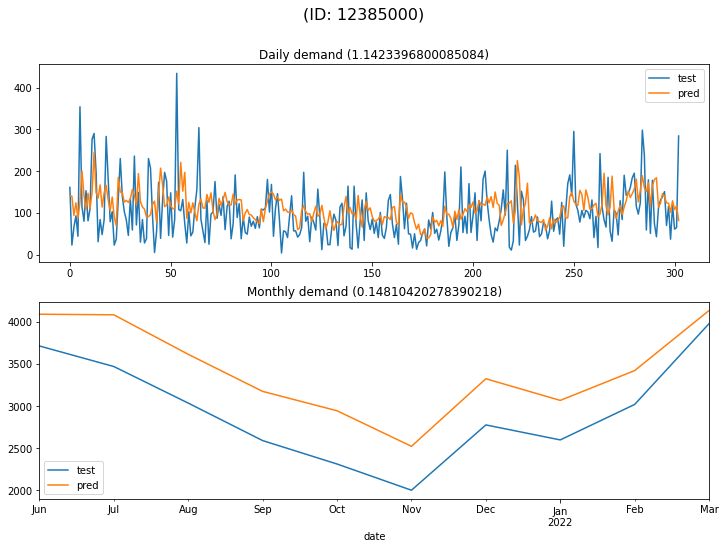

In [ ]:
# Daily prediction
import os

def predictions_viz(daily_prediction, daily_mape, monthly_prediction, monthly_mape, save=None):
    fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)
    prod_name = daily_demand.loc[daily_demand['product_id'] == prod_id].iloc[0]
    fig.suptitle(f'(ID: {prod_id})', fontsize=16)

    daily_prediction['gt'].plot(ax=ax[0], label='test')
    daily_prediction['pred'].plot(ax=ax[0], label='pred')
    ax[0].legend()
    ax[0].set_title(f'Daily demand ({daily_mape})')

    # Monthly prediction
    monthly_prediction['gt'].plot(ax=ax[1], label='test')
    monthly_prediction['pred'].plot(ax=ax[1], label='pred')
    ax[1].legend()
    ax[1].set_title(f'Monthly demand ({monthly_mape})');

    if save is not None:
        if not os.path.exists(save):
            os.makedirs(save)
        plt.savefig(os.path.join(save, f'{prod_id}.png'))

# TEST
# daily_mape, predictions = daily_predict(forecaster, prod_df)
# monthly_mape, monthly_demand = monthly_predict(predictions, data_test)
predictions_viz(daily_prediction, daily_mape, monthly_prediction, monthly_mape)

- Chạy forecaster cho toàn bộ product và lưu MAPE từng product

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

end_train = '2020-12-01'
end_validation = '2021-06-01'
mape_dict = {'prod_id': daily_demand['product_id'].unique(), 
             'daily_mape': [], 
             'monthly_mape': []}

for prod_id in mape_dict['prod_id']:
    prod_df = daily_demand[daily_demand['product_id'] == prod_id]
    prod_df.drop(columns=['product_id', 'Group', 'CasePerPallet', 'KgPerCase', 'ShelfLifeInDays', 'NetSalesValuePerCase',
                      'COGSPerCase', 'ProfitPerCase', 'ShelfLifeLabel'],
             inplace=True)
    prod_df = prod_df.set_index('date')
    
    # test set
    data_test = prod_df.loc[end_validation:, :]

    # daily prediction
    daily_mape, daily_prediction = daily_predict(forecaster, prod_df)
    mape_dict['daily_mape'].append(daily_mape)

    # monthly prediction
    monthly_mape, monthly_prediction = monthly_predict(predictions, data_test)
    mape_dict['monthly_mape'].append(monthly_mape)

    predictions_viz(daily_prediction,daily_mape, monthly_prediction,monthly_mape, 'output/prediction_XGBooting2');
    
mape_df = pd.DataFrame(mape_dict)
mape_df.to_csv('output/models/xgbooting2.csv', index=False)
mape_df